In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//')

c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\notebooks
c:
Users
sceac10
c:\sceac10\


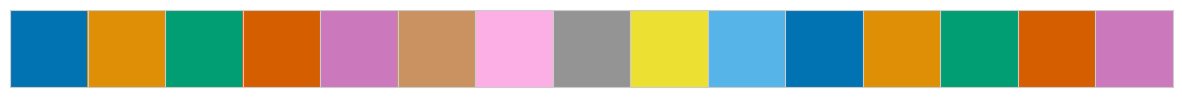

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
import random

from src.common import enums
from pathlib import Path

random.seed(42)

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
export_fig_format = "pdf"
fig_format = "png"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
sns.palplot(sns.color_palette())

markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)


In [4]:
## Import results

path_results:Path = Path().absolute().parent/"data"
category = enums.Category.HDD
area = enums.Area.CARDIFF
list_summary_df:list[pd.Series] = []


path_rolling:Path = path_results/"rolling"
pathlist = Path(path_rolling).rglob('*.csv')

for path in pathlist:     
     if category.value in path.name and area.value in path.name and "rolling" in path.name:
          path_in_str = str(path)
          temp_dataf = pd.read_csv(path, index_col=0, parse_dates=True)
          temp_mean_dataf = temp_dataf.mean(axis=1)
          temp_mean_dataf.name = path.stem
          list_summary_df.append(temp_mean_dataf)
          print(path_in_str)

rolling_summary_df = pd.concat(list_summary_df, axis=1).sort_index(axis=1)
dataf = rolling_summary_df.copy()
rolling_summary_df.head()



degree_days_dataf = pd.read_csv(path_results/"raw"/f"{area.value}_degree_days.csv", index_col=0, parse_dates=True)

c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\data\rolling\Cardiff_hdd_rolling_01_days.csv
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\data\rolling\Cardiff_hdd_rolling_07_days.csv
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\data\rolling\Cardiff_hdd_rolling_14_days.csv
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\data\rolling\Cardiff_hdd_rolling_21_days.csv
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\data\rolling\Cardiff_hdd_rolling_28_days.csv


In [5]:
set(rolling_summary_df[rolling_summary_df.sum(axis=1)>0].index.month)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [5]:
degree_days_dataf

,Solar_radiation_(W/m2),Temperature_(degreeC),hdd_15.5,cdd_24
Datetime_UTC,,,,
2010-01-01 00:00:00+00:00,0.0,-0.761292,0.677554,0.0
2010-01-01 01:00:00+00:00,0.0,-1.053894,0.689746,0.0
2010-01-01 02:00:00+00:00,0.0,-1.288513,0.699521,0.0
2010-01-01 03:00:00+00:00,0.0,-1.463013,0.706792,0.0
2010-01-01 04:00:00+00:00,0.0,-1.604095,0.712671,0.0
...,...,...,...,...
2021-12-31 19:00:00+00:00,0.0,12.305511,0.133104,0.0
2021-12-31 20:00:00+00:00,0.0,12.561249,0.122448,0.0
2021-12-31 21:00:00+00:00,0.0,12.509552,0.124602,0.0


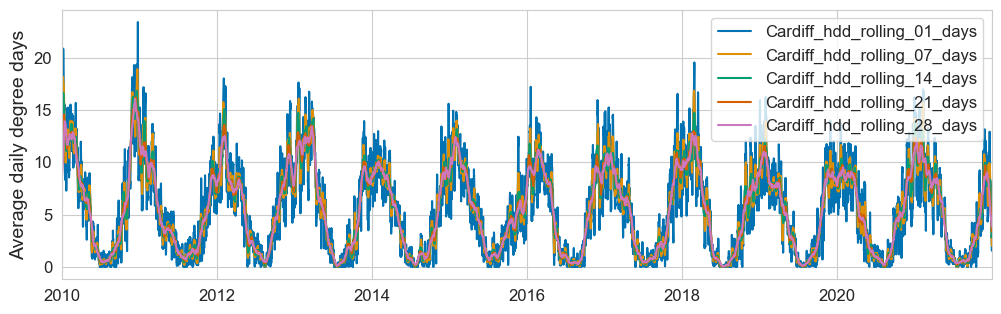

In [7]:
fig, ax = plt.subplots(figsize=figsize)

rolling_summary_df.plot(ax=ax)
ax.set_ylabel("Average daily degree days")
ax.set_xlabel("")
ax.margins(0, None)

In [6]:
def get_number_DD(dataf:pd.DataFrame, target_year:int, category:enums.Category)->float:
    """Return the number of HDD/CDD for a target year."""
    filt = dataf.index.year == target_year
    target_col = [x for x in dataf.columns if category.value in x][0]
    return float(dataf.loc[filt, target_col].sum())

get_number_DD(degree_days_dataf, 2020, enums.Category.CDD)


4.9004605611165335

In [9]:
to_plot_df = dataf.copy()
for c in dataf.columns:
    quantile_99 = dataf[c].quantile(0.99)
    to_plot_df.loc[to_plot_df[c]<quantile_99, c]= np.nan
    to_plot_df.loc[to_plot_df[c]>=quantile_99, c]= int(c.split("_")[-2])

to_plot_df = to_plot_df.dropna(how="all")

In [11]:
(12167-14605)/14605

-0.16692913385826771

In [10]:
to_plot_df

,Cardiff_hdd_rolling_01_days,Cardiff_hdd_rolling_07_days,Cardiff_hdd_rolling_14_days,Cardiff_hdd_rolling_21_days,Cardiff_hdd_rolling_28_days
Datetime_UTC,,,,,
2010-01-03 16:00:00+00:00,1.0,NaN,NaN,NaN,NaN
2010-01-03 17:00:00+00:00,1.0,NaN,NaN,NaN,NaN
2010-01-03 18:00:00+00:00,1.0,NaN,NaN,NaN,NaN
2010-01-03 19:00:00+00:00,1.0,NaN,NaN,NaN,NaN
2010-01-03 20:00:00+00:00,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-02-13 06:00:00+00:00,1.0,NaN,NaN,NaN,NaN
2021-02-13 07:00:00+00:00,1.0,NaN,NaN,NaN,NaN
2021-02-13 08:00:00+00:00,1.0,NaN,NaN,NaN,NaN


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0.5, 1.0, 'Occurences of values>=99th percentile')

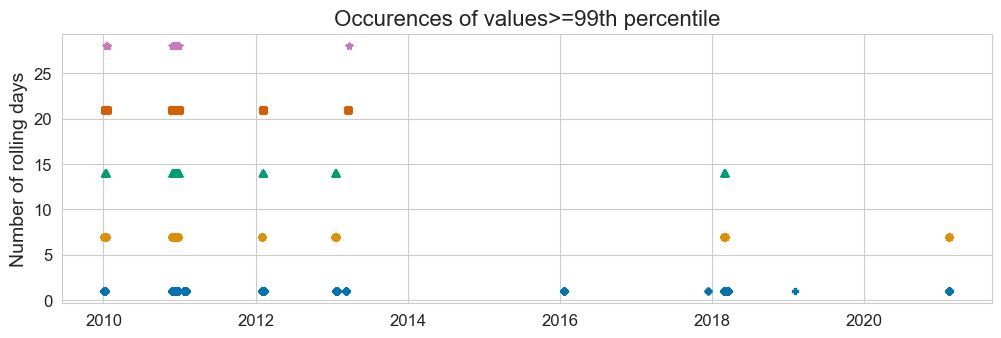

In [12]:
fig, ax = plt.subplots(figsize=figsize)
for ii, c in enumerate(to_plot_df.columns):
    to_plot_df.reset_index().plot.scatter(x='Datetime_UTC', y=c, ax=ax, color=sns.color_palette()[ii], marker=markers[ii])

ax.set_ylabel("Number of rolling days")
ax.set_xlabel("")
ax.set_title("Occurences of values>=99th percentile")

In [ ]:
#Plot HDD/CDD duration curves


fig, ax = plt.subplots(figsize=figsize)

for c in dataf.columns:
    dataf[c].sort_values(ascending=False).reset_index(drop=True).plot(ax=ax, label=c)

ax.legend()
ax.margins(0, None)
ax.set_ylim(0, None)
ax.set_xlim(0, 2_000)
ax.set_ylabel("Average daily degree days")
ax.set_xlabel("Duration (hours)")
ax.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

In [ ]:
quantile_df = pd.DataFrame()
quantile_df.index = dataf.columns.str.split("_").str[-2].astype(int)
#add other quantiles to the dataframe

for q in [1, 0.95, 0.9, 0.85, 0.8]:
    quantile_df[f'{q*100:.0f}'+'$^{th}$ percentile'] = dataf.quantile(q).values*quantile_df.index.values

quantile_df

In [ ]:
fig, ax = plt.subplots(figsize=figsize)

quantile_df['100$^{th}$ percentile'].plot(ax=ax, color='black')
ax.set_xlabel("Duration (days)")

nb_columns = len(quantile_df.columns)
alphas = np.linspace(0.2, 0.9, num=nb_columns-1)
alphas = alphas[::-1]

for ii in range(1, nb_columns):
    ax.fill_between(quantile_df.index, 
                        quantile_df.iloc[:, ii-1].values, 
                        quantile_df.iloc[:, ii].values, 
                        color=sns.color_palette()[0],
                        alpha=alphas[ii-1],
                        label=quantile_df.columns[ii])

ax.margins(0, None)
ax.set_ylim(0, None)
ax.legend()
ax.set_ylabel("Amount of energy required\n (currenlty sum of hdd)")